In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from zipfile import ZipFile

In [36]:
def load_dataframe(caminho, verbose=True):
    arquivo = ZipFile(caminho)
    if verbose:
        for i,f in enumerate(arquivo.namelist()):
            print(f' ({i}) {f}')
    file_to_load_df = arquivo.namelist()[0]

    df = pd.read_csv(arquivo.open(file_to_load_df), sep=';')
    return df

In [37]:
caminho = '../../data/HIST_PAINEL_COVIDBR_12jan2021.zip'

df = load_dataframe(caminho)
print(df.shape)
print(df.columns)
df.head()

 (0) HIST_PAINEL_COVIDBR_12jan2021.csv
(1641617, 17)
Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [38]:
df[['populacaoTCU2019','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos','Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana']].describe()

,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,1.635485e+06,1.641617e+06,1.641617e+06,1.641617e+06,1.641617e+06,2.700000e+02,270.000000,1.626440e+06
mean,1.206542e+05,1.806453e+03,1.497725e+01,5.397014e+01,3.740641e-01,3.064872e+06,503586.962963,6.929982e-02
std,3.089801e+06,5.911772e+04,4.641644e+02,1.704820e+03,1.136961e+01,2.314493e+06,219646.308370,2.539634e-01
min,7.810000e+02,0.000000e+00,-7.926000e+03,0.000000e+00,-2.920000e+02,2.213000e+04,14062.000000,0.000000e+00
25%,5.474000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.796782e+05,387171.000000,0.000000e+00
50%,1.170800e+04,6.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,3.128415e+06,530166.000000,0.000000e+00
75%,2.576800e+04,2.930000e+02,2.000000e+00,6.000000e+00,0.000000e+00,5.115398e+06,688067.250000,0.000000e+00
max,2.101471e+08,8.195637e+06,8.784300e+04,2.046900e+05,1.595000e+03,7.273707e+06,817642.000000,1.000000e+00


In [39]:
df['estado'].unique()

array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [40]:
df['nomeRegiaoSaude'].unique()[:10]

array([nan, 'ZONA DA MATA', 'VALE DO JAMARI', 'CONE SUL', 'CAFE',
       'VALE DO GUAPORE', 'MADEIRA-MAMORE', 'CENTRAL',
       'BAIXO ACRE E PURUS', 'ALTO ACRE'], dtype=object)

In [41]:
df['data'] = pd.to_datetime(df['data'])

df['obitos_por_casos_novos']     = np.log10(df['obitosNovos']/df['casosNovos'])
df['obitos_por_casos_acumulado'] = np.log10(df['obitosAcumulado']/df['casosAcumulado'])


df['casos_por_obitos_novos']     = np.log10(df['casosNovos']/df['obitosNovos'])
df['casos_por_obitos_acumulado'] = np.log10(df['casosAcumulado']/df['obitosAcumulado'])

In [42]:
def casos_por_obitos_do_estado(estado='RS', casos_por_obitos = 1):
    if estado == 'Brasil':
        df_estado = df[df['regiao']==estado]  
    else:
        df_estado = df[df['estado']==estado] 
        
    df_estado = df_estado[df_estado['codmun'].isna()]
    
    if casos_por_obitos==1:
        value_vars = ['casos_por_obitos_novos', 'casos_por_obitos_acumulado']
    else:
        value_vars = ['obitos_por_casos_novos', 'obitos_por_casos_acumulado']
    df_estado = df_estado.melt(id_vars='data', value_vars=value_vars) # 'casosAcumulado' 'obitosAcumulado'
    return df_estado

In [43]:
def plot_timeseries_casos_por_obitos(df_estado):
    plt.figure(figsize=(11,7))
    sns.lineplot(data=df_estado, x='data', y='value', hue='variable')
    plt.yticks(ticks=range(5),labels=10**np.array(range(5)))
    plt.legend(['Novos','Acumulados'])
    plt.ylabel('Casos por Óbito')
    # df_estado

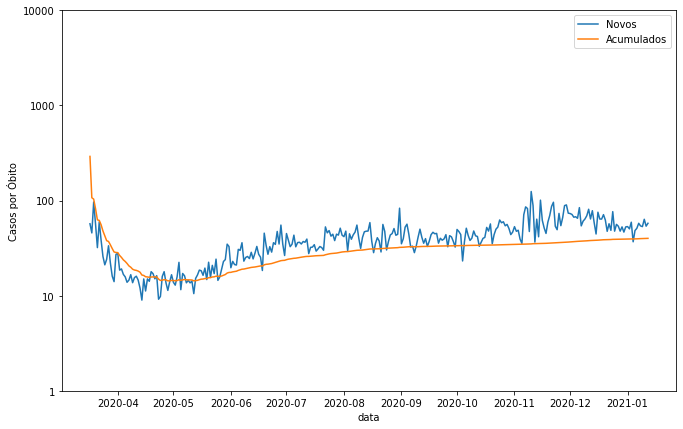

In [44]:
df_estado = casos_por_obitos_do_estado(estado='Brasil', casos_por_obitos=1)
plot_timeseries_casos_por_obitos(df_estado)


In [45]:
df_estado.set_index('data').loc['2020-10':'2021-01']

,variable,value
data,,
2020-10-01,casos_por_obitos_novos,1.696061
2020-10-02,casos_por_obitos_novos,1.674116
2020-10-03,casos_por_obitos_novos,1.642694
2020-10-04,casos_por_obitos_novos,1.364872
2020-10-05,casos_por_obitos_novos,1.568020
...,...,...
2021-01-08,casos_por_obitos_acumulado,1.599645
2021-01-09,casos_por_obitos_acumulado,1.600490
2021-01-10,casos_por_obitos_acumulado,1.601085


In [46]:
df_estado.rename_axis('estado',axis='columns').axes[1].name

'estado'